<a href="https://colab.research.google.com/github/MuralidharB/tft-stocks/blob/master/timeseriestransformer_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses time series transformer in https://huggingface.co/blog/time-series-transformers to implement stock price predictor

In [ ]:
# Installation
!pip install --upgrade mxnet==1.6.0
!pip install gluonts
!pip install yfinance
!pip install datasets
!pip install transformers
!pip install accelerate
!pip install torch
!pip install evaluate
!pip install torchviz

In [ ]:
load_from_pretrained = True # loads parameters and configuration from saved directory
model_save_path = "sample_data/timeseriestransformer-stocks" # model saved directory path
skip_training = False  # skip training if the model is loaded from pretained
epoches = 2

In [ ]:
import yfinance as yahooFinance
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

stocks = ["AAPL", '^IXIC', '^GSPC', '^DJI','MSFT', 'GOOG', 'GOOGL', 'AMZN', 'UNH', 'XOM', 'JNJ', 'V', 'JPM', 'NVDA']
stocks1 = ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'UNH', 'XOM', 'JNJ', 'V', 'JPM', 'NVDA',
          'WMT', 'TSLA', 'PG', 'META', 'MA', 'CVX', 'LLY', 'HD', 'ABBV', 'MRK', 'BAC', 'KO', 
          'PFE', 'PEP', 'AVGO', 'ORCL', 'TMO', 'COST', 'CSCO', 'ABT', 'MCD', 'NKE', 'DHR', 
          'TMUS', 'ACN', 'DIS', 'VZ', 'NEE', 'CMCSA', 'WFC', 'TXN', 'LIN', 'PM', 'UPS', 'ADBE', 
          'BMY', 'SCHW', 'MS', 'CRM', 'COP', 'RTX', 'AMGN', 'NFLX', 'HON', 'T', 'UNP', 'QCOM', 
          'IBM', 'DE', 'CAT', 'LOW', 'BA', 'SBUX', 'INTC', 'SPGI', 'LMT', 'GS', 'CVS', 'BLK', 
          'AXP', 'ELV', 'AMD', 'GILD', 'INTU', 'PLD', 'MDT', 'AMT', 'ADP', 'SYK', 'ISRG', 
          'TJX', 'EL', 'C', 'CB', 'CI', 'MDLZ', 'AMAT', 'PYPL', 'ADI', 'BKNG', 'MMC', 'MO', 'GE', 
          'DUK', 'SLB', 'SO', 'PGR', 'NOW', 'NOC', 'VRTX', 'EOG', 'REGN', 'ZTS', 'TGT', 'MRNA', 'BDX', 
          'MMM', 'HCA', 'USB', 'ITW', 'APD', 'CSX', 'GD', 'PNC', 'BSX', 'CL', 'WM', 'EQIX', 'FISV', 'FCX', 
          'CME', 'ETN', 'CCI', 'AON', 'SHW', 'LRCX', 'MU', 'TFC', 'HUM', 'ATVI', 'ICE', 'KLAC', 'NSC', 
          'CHTR', 'OXY', 'EMR', 'MET', 'PXD', 'MPC', 'MCO', 'MCK', 'DG', 'GM', 'MNST', 'KHC', 'ORLY', 
          'D', 'VLO', 'SNPS', 'SRE', 'F', 'KDP', 'AEP', 'GIS', 'PSA', 'MAR', 'PSX', 'ROP', 'FDX', 'EW', 
          'ADM', 'APH', 'AIG', 'JCI', 'HSY', 'A', 'KMB', 'AZO', 'CTAS', 'CDNS', 'TRV', 'AFL', 'HES', 'CTVA', 
          'MSI', 'EXC', 'ECL', 'CNC', 'NXPI', 'DXCM', 'PAYX', 'NEM', 'KMI', 'ADSK', 'TT', 'MCHP', 'DVN', 
          'ROST', 'LVS', 'FIS', 'AJG', 'STZ', 'BIIB', 'SYY', 'CMG', 'O', 'RSG', 'IQV', 'PH', 'XEL', 'DOW', 
          'SPG', 'WMB', 'TEL', 'MSCI', 'IDXX', 'BK', 'NUE', 'LHX', 'FTNT', 'COF', 'ALL', 'HAL', 'PRU', 'CARR', 
          'DD', 'TDG', 'YUM', 'ANET', 'HLT', 'PCAR', 'CMI', 'ED', 'ABC', 'EA', 'AMP', 'OTIS', 'WELL', 'MTD', 
          'ODFL', 'SBAC', 'KR', 'AME', 'DLTR', 'VICI', 'DHI', 'ROK', 'WBA', 'KEYS', 'PEG', 'PCG', 'CSGP', 
          'CTSH', 'ENPH', 'RMD', 'OKE', 'WEC', 'BKR', 'NDAQ', 'WBD', 'ILMN', 'PPG', 'GLW', 'STT', 'LYB', 
          'ES', 'IFF', 'DLR', 'AWK', 'VRSK', 'DFS', 'HPQ', 'GWW', 'GPN', 'WTW', 'ON', 'FAST', 'LEN', 'CEG', 
          'APTV', 'TROW', 'URI', 'IT', 'ALB', 'CBRE', 'ZBH', 'EIX', 'MTB', 'CDW', 'ULTA', 'EFX', 'HRL', 'FANG', 
          'TSCO', 'EBAY', 'DAL', 'FE', 'VMC', 'HIG', 'ARE', 'K', 'RJF', 'GPC', 'TSN', 'FITB', 'WY', 'FTV', 
          'ACGL', 'DTE', 'BAX', 'AEE', 'IR', 'AVB', 'FRC', 'MKC', 'VRSN', 'PPL', 'EQR', 'ETR', 'HPE', 'LH', 
          'ANSS', 'LUV', 'PFG', 'MLM', 'HBAN', 'XYL', 'RF', 'CAH', 'WAT', 'CFG', 'STE', 'PWR', 'CHD', 'HOLX', 
          'CTRA', 'NTRS', 'VTR', 'EXR', 'DOV', 'CAG', 'CNP', 'WRB', 'TDY', 'GRMN', 'CMS', 'EPAM', 'STLD', 'BBY', 
          'WST', 'WAB', 'DRI', 'FSLR', 'INVH', 'MPWR', 'AES', 'JBHT', 'ALGN', 'AMCR', 'ROL', 'PAYC', 'MAA', 'IEX', 
          'INCY', 'TTWO', 'BALL', 'OMC', 'CLX', 'DGX', 'CINF', 'EXPD', 'MRO', 'MOH', 'KEY', 'COO', 'BRO', 'TRGP', 
          'SEDG', 'FOX', 'FOXA', 'PKI', 'SJM', 'HWM', 'CPB', 'LYV', 'BR', 'CF', 'FMC', 'J', 'ATO', 'ETSY', 'FDS', 
          'SWKS', 'UAL', 'ZBRA', 'NVR', 'AVY', 'MOS', 'SIVB', 'PTC', 'RCL', 'LKQ', 'MGM', 'SYF', 'TXT', 'TER', 
          'EVRG', 'CPRT', 'BEN', 'IRM', 'VTRS', 'EXPE', 'FLT', 'LW', 'GEN', 'PEAK', 'L', 'KIM', 'APA', 'IPG', 
          'ESS', 'NTAP', 'RE', 'NDSN', 'LNT', 'AKAM', 'LDOS', 'IP', 'TYL', 'TRMB', 'SNA', 'UDR', 'PARA', 'JKHY', 
          'CBOE', 'CE', 'BIO', 'POOL', 'MTCH', 'EQT', 'SWK', 'PKG', 'WDC', 'TFX', 'MKTX', 'CPT', 'DPZ', 'CRL', 'GL', 
          'STX', 'HST', 'VFC', 'MAS', 'NWS', 'NWSA', 'NI', 'PHM', 'CHRW', 'WYNN', 'HSIC', 'CCL', 'EMN', 'KMX', 'REG', 
          'BXP', 'UHS', 'BBWI', 'JNPR', 'TPR', 'BWA', 'AAL', 'ALLE', 'QRVO', 'CZR', 'CDAY', 'WRK', 'AOS', 'AAP', 'HII', 
          'HAS', 'IVZ', 'CMA', 'FFIV', 'CTLT', 'PNW', 'WHR', 'FRT', 'RHI', 'PNR', 'DISH', 'SEE', 'RL', 'ZION', 'OGN', 
          'NRG', 'XRAY', 'MHK', 'DVA', 'SBNY', 'GNRC', 'AIZ', 'DXC', 'NWL', 'ALK', 'NCLH', 'LUMN', 'LNC', 'VNO', 'TECH', 
          'TAP', '^IXIC', '^GSPC', '^DJI']

stocks_ts = pd.DataFrame()
for stock in stocks:
    data = yahooFinance.Ticker(stock).history(period="10y")
    d = data.copy()[['Open', 'Volume']]
    stocks_ts.insert(0, stock+"_Open", d['Open'])
    stocks_ts.insert(0, stock+"_Volume", d['Volume'])

print(stocks_ts)

# add other indicators
# inflation rate, interest rate, employment

fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    stocks_ts[stocks_ts.columns[i]].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("Open")   
    axx[i].grid(which='minor', axis='x')

In [ ]:
import pandas as pd
infvalues=pd.read_csv("sample_data/Book2.csv")
infvalues=infvalues.drop(["Year", "Annual"], axis=1).values
inf=[]
for i in infvalues:
  inf = inf + list(i)

dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-12-31 00:00:00-05:00", freq="M")

inf.reverse()
csvdf=pd.DataFrame(inf)
csvdf.index=dti

dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-12-31 00:00:00-05:00", freq="D")
dti.name = 'date'
csvdf=csvdf.reindex(dti, method='ffill')
csvdf.columns = ["Rates"]
stocks_ts = stocks_ts.assign(Inflation=csvdf["Rates"])

In [ ]:
import pandas as pd
fedrates=pd.read_csv("sample_data/fed-funds-rate-historical-chart.csv")

#fedrates = fedrates.drop("date", axis=1)
dti=pd.date_range(start="1955-12-12 00:00:00-05:00", end="2023-01-31 00:00:00-05:00", freq="D")
fedrates.index = dti
stocks_ts = stocks_ts.assign(InterestRates=fedrates["value"])

In [ ]:
import pandas as pd

crudeprices=pd.read_csv("sample_data/crudeoil.csv")
crudeprices['Datetime'] = pd.to_datetime(crudeprices['date'] + " 00:00:00-05:00")
crudeprices = crudeprices.set_index('Datetime')

crudeprices.resample('1D').mean().ffill()
crudeprices = crudeprices.drop("date", axis=1)

dti=pd.date_range(start="2010-01-21 00:00:00-05:00", end="2023-02-02 00:00:00-05:00", freq="D")
crudeprices=crudeprices.reindex(dti, method='ffill')
print(crudeprices.head())
stocks_ts = stocks_ts.assign(CrudeRates=crudeprices["value"])

                           value
2010-01-21 00:00:00-05:00  75.84
2010-01-22 00:00:00-05:00  74.25
2010-01-23 00:00:00-05:00  74.25
2010-01-24 00:00:00-05:00  74.25
2010-01-25 00:00:00-05:00  74.90


In [ ]:
import pandas as pd

vix=pd.read_csv("sample_data/vix-volatility-index-historical-chart.csv")
vix['Datetime'] = pd.to_datetime(vix['date'] + " 00:00:00-05:00")
vix = vix.set_index('Datetime')

vix.resample('1D').mean().ffill()
vix = vix.drop("date", axis=1)

dti=pd.date_range(start="1990-01-02 00:00:00-05:00", end="2023-02-08 00:00:00-05:00", freq="D")
vix=vix.reindex(dti, method='ffill')
print(vix)
stocks_ts = stocks_ts.assign(Vix=vix["value"])

                           value
1990-01-02 00:00:00-05:00  17.24
1990-01-03 00:00:00-05:00  18.19
1990-01-04 00:00:00-05:00  19.22
1990-01-05 00:00:00-05:00  20.11
1990-01-06 00:00:00-05:00  20.11
...                          ...
2023-02-04 00:00:00-05:00  20.34
2023-02-05 00:00:00-05:00  20.34
2023-02-06 00:00:00-05:00  20.34
2023-02-07 00:00:00-05:00  20.34
2023-02-08 00:00:00-05:00  20.34

[12091 rows x 1 columns]


In [ ]:
import pandas as pd
from datetime import datetime

pcr=pd.read_csv("sample_data/pcr.csv")
pcr["date"] = [datetime.fromtimestamp(x/1000) for x in pcr["date"]]
pcr["date"] = [str(x.date()) + " 00:00:00-05:00" for x in pcr["date"]]
pcr = pcr.drop_duplicates(subset='date', keep="first")
pcr['Datetime'] = pd.to_datetime(pcr['date'])
pcr = pcr.set_index("Datetime")

pcr.resample('1D').mean().ffill()
pcr = pcr.drop("date", axis=1)

dti = pd.date_range(start="2006-10-31 00:00:00-05:00", end="2023-01-20 00:00:00-05:00", freq="D")

pcr = pcr.reindex(dti, method='ffill')
print(pcr)
stocks_ts = stocks_ts.assign(Pcr=pcr["value"])
print(stocks_ts)

In [ ]:
import pandas as pd
unemplrates=pd.read_csv("sample_data/us-national-unemployment-rate.csv")

#fedrates = fedrates.drop("date", axis=1)
dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-07-01 00:00:00-05:00", freq="M")
unemplrates.index = dti

dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-07-01 00:00:00-05:00", freq="D")
dti.name = 'date'
unemplrates=unemplrates.reindex(dti, method='ffill')

stocks_ts = stocks_ts.assign(UnemploymentRates=unemplrates["value"])
print(stocks_ts)

In [ ]:
import pandas as pd

macd=pd.read_csv("sample_data/macd.csv")
macd['Datetime'] = pd.to_datetime(macd['Trade Date'] + " 00:00:00-05:00")
macd = macd.set_index("Datetime")

macd.resample('1D').mean().ffill()
macd = macd.drop("Trade Date", axis=1)

dti = pd.date_range(start="2000-02-21 00:00:00-05:00", end="2023-01-20 00:00:00-05:00", freq="D")

macd = macd.reindex(dti, method='ffill')
print(macd)

stocks_ts = stocks_ts.assign(MACD=macd["MACD(26,12)"])
stocks_ts = stocks_ts.assign(EXP=macd["Exp(9)"])
stocks_ts = stocks_ts.assign(MacdHist=macd["Macd Histogram"])
print(stocks_ts)


In [ ]:
train_data = stocks_ts[:-259]
l = stocks_ts.shape[0]
print(l, stocks_ts.shape)
validation_data = stocks_ts[:-259+24]
l = l - 259 + 24
test_data = stocks_ts[l:]
print(l, len(validation_data), len(train_data), len(test_data), len(stocks_ts))

2518 (2518, 37)
2283 2283 2259 235 2518


In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName


def to_deepar_format(dataframe):
    freq = pd.infer_freq(dataframe.index) 
    if not freq:
        freq = 'D'
    start_index = dataframe.index.min()
    data = [{
                FieldName.START:  start_index,
                FieldName.TARGET:  dataframe[c].values,
                FieldName.ITEM_ID: c,
                FieldName.FEAT_STATIC_CAT: [idx],
            } 
            for idx, c in enumerate(dataframe.columns)]
    return ListDataset(data, freq=freq)
train_data_lds = to_deepar_format(train_data)
test_data_lds = to_deepar_format(test_data)
validation_data_lds = to_deepar_format(validation_data)


In [ ]:
from datasets import Dataset, DatasetDict
l = stocks_ts.shape[0]
train = Dataset.from_pandas(stocks_ts[:-259])
l = l-259
validation = Dataset.from_pandas(stocks_ts[:-259+24])
l = l + 24
test = Dataset.from_pandas(stocks_ts[l:])
dataset = DatasetDict({"train":train_data_lds, "validation":validation_data_lds, "test":test_data_lds})

In [ ]:
train_example = dataset['train'][1]
train_example.keys()
validation_example = dataset['validation'][1]
freq = "1D"
prediction_length = 24

assert len(train_example['target']) + prediction_length == len(validation_example['target'])

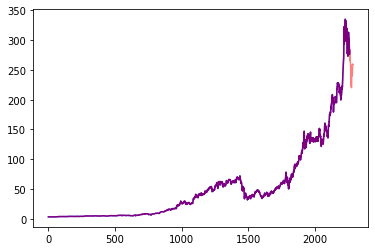

In [ ]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
axes.plot(train_example['target'], color="blue") 
axes.plot(validation_example['target'], color="red", alpha=0.5)

plt.show()

In [ ]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]
validation_dataset = dataset['validation']

print(len(train_dataset), len(train_dataset[0]['target']), len(validation_dataset[0]['target']), len(test_dataset[0]['target']))

37 2259 2283 235


In [ ]:
from gluonts.time_feature import get_lags_for_frequency

lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence)


[1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 20, 21, 22, 27, 28, 29, 30, 31, 56, 84, 363, 364, 365, 727, 728, 729, 1091, 1092, 1093]


In [ ]:
from gluonts.time_feature import time_features_from_frequency_str

time_features = time_features_from_frequency_str(freq)
print(time_features)

[<function day_of_week at 0x7f151eb45280>, <function day_of_month at 0x7f151eb45dc0>, <function day_of_year at 0x7f151eb45ee0>]


In [ ]:
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

config = TimeSeriesTransformerConfig(
    prediction_length=prediction_length,
    context_length=prediction_length*3, # context length
    lags_sequence=lags_sequence,
    num_time_features=len(time_features) + 1, # we'll add 3 time features (day of week, day of month, day of year)
    num_static_categorical_features=1, # we have a single static categorical feature, namely time series ID
    cardinality=[len(train_dataset)], # it has 1011 possible values
    embedding_dimension=[10], # the model will learn an embedding of size 10 for each of the 1011 possible values
    encoder_layers=4, 
    decoder_layers=4,
    output_attentions=True,
)
model = TimeSeriesTransformerForPrediction(config)


In [ ]:
from gluonts.time_feature import time_features_from_frequency_str, TimeFeature, get_lags_for_frequency
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)


In [ ]:
from transformers import PretrainedConfig

def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)

    # a bit like torchvision.transforms.Compose
    return Chain(
        # step 1: remove static/dynamic fields if not specified
        [RemoveFields(field_names=remove_field_names)]
        # step 2: use static features if available, if not add dummy values
        + (
            [SetField(output_field=FieldName.FEAT_STATIC_CAT, value=[0])]
            if not config.num_static_categorical_features > 0
            else []
        )
        + (
            [SetField(output_field=FieldName.FEAT_STATIC_REAL, value=[0.0])]
            if not config.num_static_real_features > 0
            else []
        )
        # step 3: convert the data to NumPy (potentially not needed)
        + [
            AsNumpyArray(
                field=FieldName.FEAT_STATIC_CAT,
                expected_ndim=1,
                dtype=int,
            ),
            AsNumpyArray(
                field=FieldName.FEAT_STATIC_REAL,
                expected_ndim=1,
            ),
            AsNumpyArray(
                field=FieldName.TARGET,
                # in the following line, we add 1 for the time dimension
                expected_ndim=1 if config.input_size==1 else 2,
            ),
            # step 4: handle the NaN's by filling in the target with zero
            # and return the mask (which is in the observed values)
            # true for observed values, false for nan's
            # the decoder uses this mask (no loss is incurred for unobserved values)
            # see loss_weights inside the xxxForPrediction model
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 5: add temporal features based on freq of the dataset
            # month of year in this case
            # these serve as positional encodings
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 6: add another temporal feature (just a single number)
            # tells the model where in the life the value of the time series is
            # sort of running counter
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 7: vertically stack all the temporal features
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + ([FieldName.FEAT_DYNAMIC_REAL] if config.num_dynamic_real_features > 0 else []),
            ),
            # step 8: rename to match HuggingFace names
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )


In [ ]:
from gluonts.transform.sampler import InstanceSampler
from typing import Optional

def create_instance_splitter(config: PretrainedConfig, mode: str, train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation":  validation_sampler or ValidationSplitSampler(
            min_future=config.prediction_length
        ),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=[
            "time_features",
            "observed_mask",
        ],
    )


In [ ]:
from gluonts.itertools import Cyclic, IterableSlice, PseudoShuffled
from gluonts.torch.util import IterableDataset
from torch.utils.data import DataLoader

from typing import Iterable

def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "static_categorical_features",
        "static_real_features",
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
        ]

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
        ]
    
    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(
        config, "train"
    ) + SelectFields(TRAINING_INPUT_NAMES)


    # the instance splitter will sample a window of 
    # context length + lags + prediction length (from the 366 possible transformed time series)
    # randomly from within the target time series and return an iterator.
    training_instances = instance_splitter.apply(
        Cyclic(transformed_data)
        if shuffle_buffer_length is None
        else PseudoShuffled(
            Cyclic(transformed_data), 
            shuffle_buffer_length=shuffle_buffer_length,
        )
    )
    # from the training instances iterator we now return a Dataloader which will 
    # continue to sample random windows for as long as it is called
    # to return batch_size of the appropriate tensors ready for training!
    return IterableSlice(
        iter(
            DataLoader(
                IterableDataset(training_instances),
                batch_size=batch_size,
                **kwargs,
            )
        ),
        num_batches_per_epoch,
    )


In [ ]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "static_categorical_features",
        "static_real_features",
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
        ]
    
    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)
    
    # we create a Test Instance splitter which will sample the very last 
    # context window seen during training only for the encoder.
    instance_splitter = create_instance_splitter(
        config, "test"
    ) + SelectFields(PREDICTION_INPUT_NAMES)
    
    # we apply the transformations in test mode
    testing_instances = instance_splitter.apply(transformed_data, is_train=False)
    
    # This returns a Dataloader which will go over the dataset once.
    return DataLoader(IterableDataset(testing_instances), batch_size=batch_size, **kwargs)


In [ ]:
train_dataloader = create_train_dataloader(
    config=config, 
    freq=freq, 
    data=train_dataset, 
    batch_size=256, 
    num_batches_per_epoch=100,
)

test_dataloader = create_test_dataloader(
    config=config, 
    freq=freq, 
    data=test_dataset,
    batch_size=64,
)


In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v, v.type())

In [ ]:
# perform forward pass
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True
)


In [ ]:
print("Loss:", outputs['encoder_attentions'])

In [ ]:
import os
from accelerate import Accelerator
from torch.optim import Adam

accelerator = Accelerator()
device = accelerator.device

model.to(device)
optimizer = Adam(model.parameters(), lr=1e-6)
 
model, optimizer, train_dataloader = accelerator.prepare(
    model, optimizer, train_dataloader, 
)

if os.path.exists(model_save_path) and \
      load_from_pretrained:
    model.from_pretrained(model_save_path)
else:
    skip_training = False

if skip_training:
  outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True
  )
  print("Loss:", outputs.loss.item())

else:
    losses = []
    for epoch in range(epoches):
        model.train()
        print("Epoch ", epoch)
        for batch in train_dataloader:
            optimizer.zero_grad()
            outputs = model(
                static_categorical_features=batch["static_categorical_features"].to(device),
                static_real_features=batch["static_real_features"].to(device),
                past_time_features=batch["past_time_features"].to(device),
                past_values=batch["past_values"].to(device),
                future_time_features=batch["future_time_features"].to(device),
                future_values=batch["future_values"].to(device),
                past_observed_mask=batch["past_observed_mask"].to(device),
                future_observed_mask=batch["future_observed_mask"].to(device),
            )
            loss = outputs.loss

            # Backpropagation
            accelerator.backward(loss)
            optimizer.step()
            losses.append(loss.item())
            print(loss)

        plt.plot(losses)
        plt.show()

    model.save_pretrained(model_save_path)


In [ ]:
model.eval()

forecasts = []
i = 0
for batch in test_dataloader:
    outputs = model.generate(
        static_categorical_features=batch["static_categorical_features"].to(device),
        static_real_features=batch["static_real_features"].to(device),
        past_time_features=batch["past_time_features"].to(device),
        past_values=batch["past_values"].to(device),
        future_time_features=batch["future_time_features"].to(device),
        past_observed_mask=batch["past_observed_mask"].to(device),
    )
    forecasts.append(outputs.sequences.cpu().numpy())

In [ ]:
import numpy as np
print(len(forecasts), forecasts[0].shape)
stacked_forecasts = np.vstack(forecasts)
print(stacked_forecasts.shape)

In [ ]:
import numpy as np
from evaluate import load
from gluonts.time_feature import get_seasonality

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

forecast_median = np.median(stacked_forecasts, 1)
print(len(forecast_median[0]))
mase_metrics = []
smape_metrics = []
for item_id, ts in enumerate(test_dataset):
    try:
      training_data = ts["target"][:-prediction_length]
      ground_truth = ts["target"][-prediction_length:]
      mase = mase_metric.compute(
          predictions=forecast_median[item_id], 
          references=np.array(ground_truth), 
          training=np.array(training_data), 
          periodicity=get_seasonality(freq))
      mase_metrics.append(mase["mase"])
      
      smape = smape_metric.compute(
          predictions=forecast_median[item_id], 
          references=np.array(ground_truth), 
      )
      smape_metrics.append(smape["smape"])
    except:
      pass

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

print(f"MASE: {np.mean(mase_metrics)}")

print(f"sMAPE: {np.mean(smape_metrics)}")


In [ ]:
plt.scatter(mase_metrics, smape_metrics, alpha=0.3)
plt.xlabel("MASE")
plt.ylabel("sMAPE")
plt.show()

In [ ]:
import matplotlib.dates as mdates

def plot(ts_index):
    ticker = test_dataset[ts_index]["item_id"].split('_')[0]
    fig, ax = plt.subplots()

    index = pd.period_range(
        start=test_dataset[ts_index][FieldName.START],
        periods=len(test_dataset[ts_index][FieldName.TARGET]),
        freq=freq,
    ).to_timestamp()
    myFmt = mdates.DateFormatter('%b %d')
    ax.xaxis.set_major_formatter(myFmt)
    plt.suptitle(ticker,fontsize=24, y=1)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid()
    ax.plot(
        index[-2*prediction_length:], 
        test_dataset[ts_index]["target"][-2*prediction_length:],
        label="actual",
    )

    plt.plot(
        index[-prediction_length:], 
        np.median(stacked_forecasts[ts_index], axis=0),
        label="median",
    )
    
    plt.fill_between(
        index[-prediction_length:],
        stacked_forecasts[ts_index].mean(0) - stacked_forecasts[ts_index].std(axis=0), 
        stacked_forecasts[ts_index].mean(0) + stacked_forecasts[ts_index].std(axis=0), 
        alpha=0.3, 
        interpolate=True,
        label="+/- 1-std",
    )
    plt.legend()
    plt.show()


In [ ]:
for i in range(10):
  plot(i)